In [3]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Q1

No Biopsy, Treatment

In [4]:
S=np.random.gamma(shape=1, scale=3/2, size=1000000) #scale=1/rate
Y = np.where(S>3,S,0)
X = 10000/110000
Uy = (1-np.exp(-Y))/(1-np.exp(-6))
Ux = (1-np.exp(-X))/(1-np.exp(-1))
U = 0.2*Ux + 0.7*Uy + 0.1*Ux*Uy

In [5]:
U.mean(), Uy.mean(), Ux.mean()

(0.12200152148136596, 0.13240960445740477, 0.13747264268508996)

Finding the critical value R*

In [6]:
for r_star in np.arange(2,6,1):
  S=np.random.gamma(shape=1, scale=3/2, size=1000000) #scale=1/rate
  BR = np.random.normal(loc=S, scale = np.sqrt(S**2+4)/2) #tau = 1/sigma^2
  Treatment = np.where(BR>r_star,1,0)
  Y = np.where((S>3)&(Treatment==1),S,0)
  X = (110000 - (10000+Treatment*100000))/110000
  Uy = (1-np.exp(-Y))/(1-np.exp(-6))
  Ux = (1-np.exp(-X))/(1-np.exp(-1))
  U = 0.2*Ux + 0.7*Uy + 0.1*Ux*Uy
  print(r_star,U.mean())

2 0.20737391038080663
3 0.22055993101146582
4 0.2195638810395118
5 0.21306094529538813


In [7]:
for r_star in np.arange(2,4,0.1):
  S=np.random.gamma(shape=1, scale=3/2, size=1000000) #scale=1/rate
  BR = np.random.normal(loc=S, scale = np.sqrt(S**2+4)/2) #tau = 1/sigma^2
  Treatment = np.where(BR>r_star,1,0)
  Y = np.where((S>3)&(Treatment==1),S,0)
  X = (110000 - (10000+Treatment*100000))/110000
  Uy = (1-np.exp(-Y))/(1-np.exp(-6))
  Ux = (1-np.exp(-X))/(1-np.exp(-1))
  U = 0.2*Ux + 0.7*Uy + 0.1*Ux*Uy
  print(r_star,U.mean())

2.0 0.2074105286588034
2.1 0.20950737529345356
2.2 0.2117609112222132
2.3000000000000003 0.21359654704054817
2.4000000000000004 0.21491978306562318
2.5000000000000004 0.21631623029168173
2.6000000000000005 0.21736350457454764
2.7000000000000006 0.21807120083260662
2.8000000000000007 0.2194693925926099
2.900000000000001 0.22022910935181683
3.000000000000001 0.2201338672708663
3.100000000000001 0.22062691717932686
3.200000000000001 0.22087391009261648
3.300000000000001 0.22105611641556713
3.4000000000000012 0.2208714552421575
3.5000000000000013 0.22116439995458628
3.6000000000000014 0.2209746028170074
3.7000000000000015 0.2206174841166305
3.8000000000000016 0.22031556649898285
3.9000000000000017 0.22007712252682807


R* in the range [3.1, 3.6] all give about the same utility



Below code is a more sample efficient way to find threshold R\*, so can run more iterations to be more precise.

In [9]:
S=np.random.gamma(shape=1, scale=3/2, size=10000000)
Result = np.random.normal(loc=S, scale = np.sqrt(S**2+4)/2) #tau = 1/sigma^2


YWithTreatment = np.where(S>3,S,0)
YWithoutTreatment =  0
XWithTreatment = 0
XWithoutTreatment = 100000/110000

UYWithTreatment = (1-np.exp(-YWithTreatment))/(1-np.exp(-6))
UYWithoutTreatment =  (1-np.exp(-YWithoutTreatment))/(1-np.exp(-6))
UXWithTreatment = (1-np.exp(-XWithTreatment))/(1-np.exp(-1))
UXWithoutTreatment = (1-np.exp(-XWithoutTreatment))/(1-np.exp(-1))

UWithTreatment = 0.2*UXWithTreatment + 0.7*UYWithTreatment + 0.1*UXWithTreatment*UYWithTreatment
UWithoutTreatment = 0.2*UXWithoutTreatment + 0.7*UYWithoutTreatment + 0.1*UXWithoutTreatment*UYWithoutTreatment

Let's visualize the impact of our decision first with respect to the biopsy result

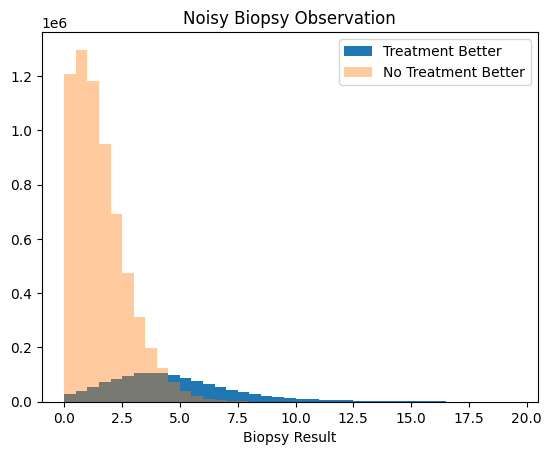

In [10]:
plt.hist(Result[(UWithTreatment > UWithoutTreatment)], label='Treatment Better', bins=np.arange(0,20,0.5))
plt.hist(Result[(UWithTreatment < UWithoutTreatment)],alpha=0.4, label='No Treatment Better', bins=np.arange(0,20,0.5))
plt.legend()
plt.title("Noisy Biopsy Observation")
plt.xlabel('Biopsy Result')
plt.show()

What if the biopsy test had no variance? (ie. it gave perfect information on S)

Text(0.5, 0, 'S')

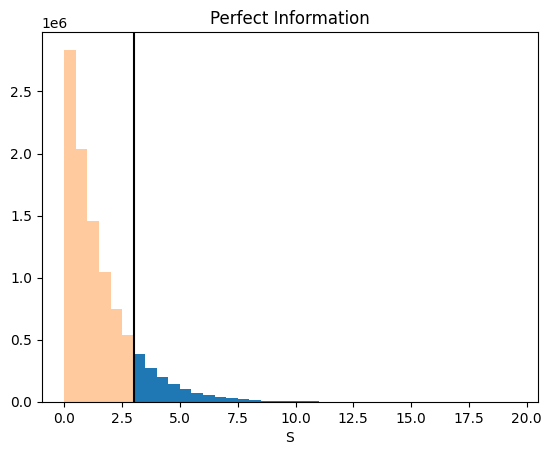

In [11]:
plt.hist(S[(UWithTreatment > UWithoutTreatment)], bins=np.arange(0,20,0.5), label='Treatment Better')
plt.hist(S[(UWithTreatment < UWithoutTreatment)],alpha=0.4, bins=np.arange(0,20,0.5), label='No Treatment Better')
plt.axvline(3, c='k')
plt.title("Perfect Information")
plt.xlabel('S')

In [15]:
for thresh in np.arange(2,5,0.5):
  Ux = np.where(Result>thresh, UXWithTreatment,UXWithoutTreatment)
  Uy = np.where(Result>thresh, UYWithTreatment,UYWithoutTreatment)
  U = 0.2*Ux + 0.7*Uy + 0.1*Ux*Uy
  print(thresh, U.mean())

2.0 0.20726263352293547
2.5 0.2161658627261632
3.0 0.22032691916738445
3.5 0.22103431232154566
4.0 0.21947108139594482
4.5 0.2165657491573913


In [16]:
for thresh in np.arange(3,4,0.1):
  Ux = np.where(Result>thresh, UXWithTreatment,UXWithoutTreatment)
  Uy = np.where(Result>thresh, UYWithTreatment,UYWithoutTreatment)
  U = 0.2*Ux + 0.7*Uy + 0.1*Ux*Uy
  print(thresh, U.mean())

3.0 0.22032691916738445
3.1 0.2206912064797151
3.2 0.22095160395431532
3.3000000000000003 0.22108674464880484
3.4000000000000004 0.22112199372617505
3.5000000000000004 0.22103431232154566
3.6000000000000005 0.22087585341627877
3.7000000000000006 0.22062907290311878
3.8000000000000007 0.22031018459985563
3.900000000000001 0.21992669906771276


R* is 3.4 (precision to 1 decimal place)

What is E[U] if Result=3.5?

In [18]:
model = pm.Model()

with model:

    # Priors for unknown model parameters
    S = pm.Gamma("S", alpha=1, beta=2/3) #alpha=shape, beta = rate = 1/scale

    # observations
    result = pm.Normal("result",mu=S,tau=4/(S**2+4), observed=3.5)

    #treatment =True
    Y= pm.math.where(S>3,S,0)

    X= 0

    Uy = pm.Deterministic('Uy',(1-pm.math.exp(-Y))/(1-np.exp(-6)))
    Ux = pm.Deterministic('Ux',(1-pm.math.exp(-X))/(1-np.exp(-1)))

    #total
    U = pm.Deterministic('U',0.2*Ux + 0.7*Uy + 0.1*Ux*Uy)

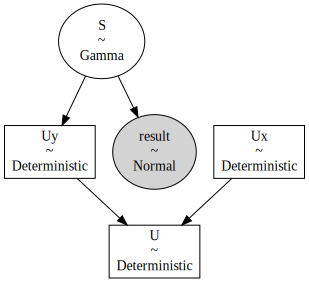

In [19]:
pm.model_to_graphviz(model)

In [21]:
with model:
    trace = pm.sample(draws= 20000,tune=1000,chains=2, random_seed=0)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
S,2.594,1.229,0.604,4.942,0.010,0.007,13371.0,12973.0,1.0
Uy,0.295,0.449,0.000,0.993,0.003,0.002,19912.0,19736.0,1.0
Ux,0.000,0.000,0.000,0.000,0.000,0.000,40000.0,40000.0,NaN
U,0.207,0.314,0.000,0.695,0.002,0.002,19912.0,19736.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


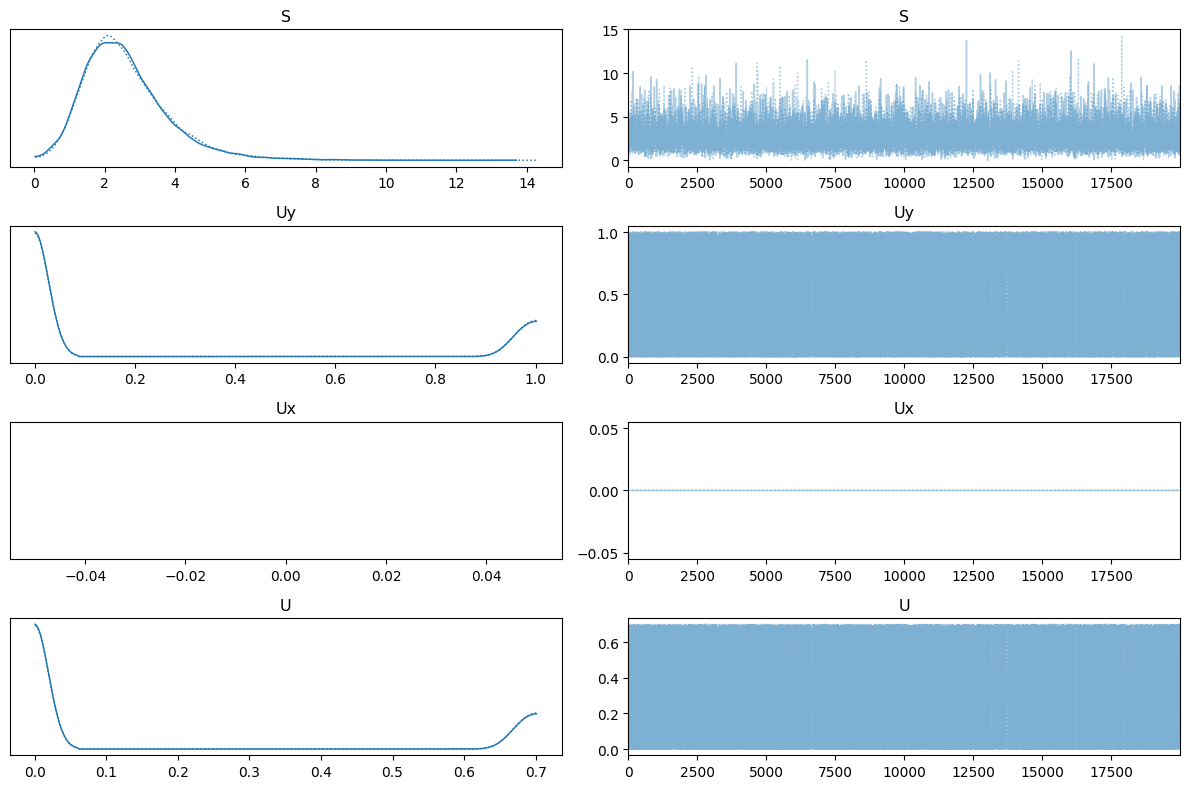

In [22]:
with model:
    display(az.summary(trace))
    az.plot_trace(trace)
    plt.tight_layout()

In [23]:
(trace['posterior']['U']).to_numpy().mean()

0.20684153683382656